In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as pytl
from scipy.stats import linregress

In [154]:
mortality = pd.read_csv('Output_CSVs/cleaned_suicide_rates.csv', encoding="utf-8")
prevalence = pd.read_csv('Output_CSVs/cleaned_prevalence_rate_sorted.csv', encoding="utf-8")
incidence = pd.read_csv('Output_CSVs/cleaned_incidence_rate_sorted.csv', encoding="utf-8")
insurance = pd.read_csv('healthcare_metrics/uninsured_population.csv', encoding="utf-8")
access = pd.read_csv('healthcare_metrics/access_to_healthcare.csv', encoding="utf-8")

# convert states to abbreviated format
state_abbr = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
            "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

prevalence = pd.DataFrame({
    "State": state_abbr,
    "Prevalence": prevalence["Prevalence of Mental Illness"]
})
prevalence.head()

incidence = incidence[["Incidence (Rate)", "Abbreviation"]]
incidence = incidence.sort_values(by="Abbreviation", ascending=True)
incidence = pd.DataFrame({
    "State": incidence["Abbreviation"],
    "Incidence": incidence["Incidence (Rate)"]
})
incidence.head()

,State,Incidence
39,AK,627095.7
19,AL,574877.5
45,AR,648514.7
42,AZ,644322.7
6,CA,536310.0


In [155]:
# rename headers for merging
mortality = pd.DataFrame({
    "State": mortality["STATE"],
    "Suicide rate": mortality["RATE"]
})
mortality.head()

,State,Suicide rate
0,AK,27.0
1,AL,16.6
2,AR,20.8
3,AZ,18.2
4,CA,10.5


In [156]:
prevalence_incidence = pd.merge(prevalence, incidence, on="State", how="right")
prevalence_incidence.head()
prevalence_incidence_mortality = pd.merge(prevalence_incidence, mortality, on="State")
prevalence_incidence_mortality.head()


,State,Prevalence,Incidence,Suicide rate
0,AL,1660935.9,574877.5,16.6
1,AK,1767354.7,627095.7,27.0
2,AZ,1799871.5,644322.7,18.2
3,AR,1737910.3,648514.7,20.8
4,CA,1597475.5,536310.0,10.5


In [157]:
insurance_sorted = insurance.sort_values(by="State", ascending=True)
insurance_sorted.head()
insurance_sorted = insurance_sorted.dropna(how="any")
insurance_sorted2 = pd.DataFrame({
    "State": state_abbr,
    "% Uninsured": insurance_sorted["%"]
})
insurance_sorted2.head()

,State,% Uninsured
44,AL,19.3
31,AK,14.9
34,AZ,15.9
39,AR,18.1
26,CA,13.3


In [158]:
combined = pd.merge(prevalence_incidence_mortality, insurance_sorted2, on="State", how="left")
combined.head()

,State,Prevalence,Incidence,Suicide rate,% Uninsured
0,AL,1660935.9,574877.5,16.6,19.3
1,AK,1767354.7,627095.7,27.0,14.9
2,AZ,1799871.5,644322.7,18.2,15.9
3,AR,1737910.3,648514.7,20.8,18.1
4,CA,1597475.5,536310.0,10.5,13.3


In [159]:
access = pd.read_csv('healthcare_metrics/access_to_healthcare.csv', encoding="utf-8")
access_sorted = access.sort_values(by="State", ascending=True)
access_sorted = access_sorted.dropna(how="any")
access_sorted2 = pd.DataFrame({
    "State": state_abbr,
    "Population/Provider": access_sorted["Population per provider"]
})
access_sorted2.head()

,State,Population/Provider
50,AL,1260.0
8,AK,300.0
46,AZ,850.0
25,AR,510.0
10,CA,350.0


In [160]:
combined_final = pd.merge(combined, access_sorted2, on="State", how="left")
combined_final.head()

,State,Prevalence,Incidence,Suicide rate,% Uninsured,Population/Provider
0,AL,1660935.9,574877.5,16.6,19.3,1260.0
1,AK,1767354.7,627095.7,27.0,14.9,300.0
2,AZ,1799871.5,644322.7,18.2,15.9,850.0
3,AR,1737910.3,648514.7,20.8,18.1,510.0
4,CA,1597475.5,536310.0,10.5,13.3,350.0


In [161]:
combined_final.to_csv("output_CSVs/combined_final_for_analysis.csv")

In [162]:
YLL = pd.read_csv('output_CSVs/cleaned_YLL_sorted.csv')
YLL = YLL[["Abbreviation", "YLL"]]
YLL = pd.DataFrame({
    "State": YLL["Abbreviation"],
    "YLL": YLL["YLL"]
})
YLL.head()

,State,YLL
0,AL,202536.9
1,AK,35573.3
2,AZ,249389.4
3,AR,81269.8
4,CA,878335.4


In [163]:
DALY = pd.read_csv('output_CSVs/cleaned_DALY_2.csv')
DALY = DALY[["Abbreviation", "DALY"]]
DALY = pd.DataFrame({
    "State": DALY["Abbreviation"],
    "DALY": DALY["DALY"]
})
DALY.head()

,State,DALY
0,AL,589755.8
1,AK,98664.7
2,AZ,852195.8
3,AR,325822.3
4,CA,3741299.1


In [164]:
combined4 = pd.merge(combined_final, YLL, on="State", how="outer")
combined4 = combined4.dropna(how="any")
combined5 = pd.merge(combined4, DALY, on="State", how="outer")
combined5 = combined5.dropna(how="any")

combined5
combined5.to_csv("Output_CSVs/all_combined_statistics_FINAL.csv", encoding="utf-8")


In [97]:
combined5.head()

,State,Prevalence,Incidence,Suicide rate,% Uninsured,Population/Provider,YLL,DALY
0,AL,1660935.9,574877.5,836,19.3,1260.0,202536.9,589755.8
1,AK,1767354.7,627095.7,200,14.9,300.0,35573.3,98664.7
2,AZ,1799871.5,644322.7,"1,327",15.9,850.0,249389.4,852195.8
3,AR,1737910.3,648514.7,631,18.1,510.0,81269.8,325822.3
4,CA,1597475.5,536310.0,"4,312",13.3,350.0,878335.4,3741299.1


## Plotting and correlation analysis

In [165]:
import seaborn as sns

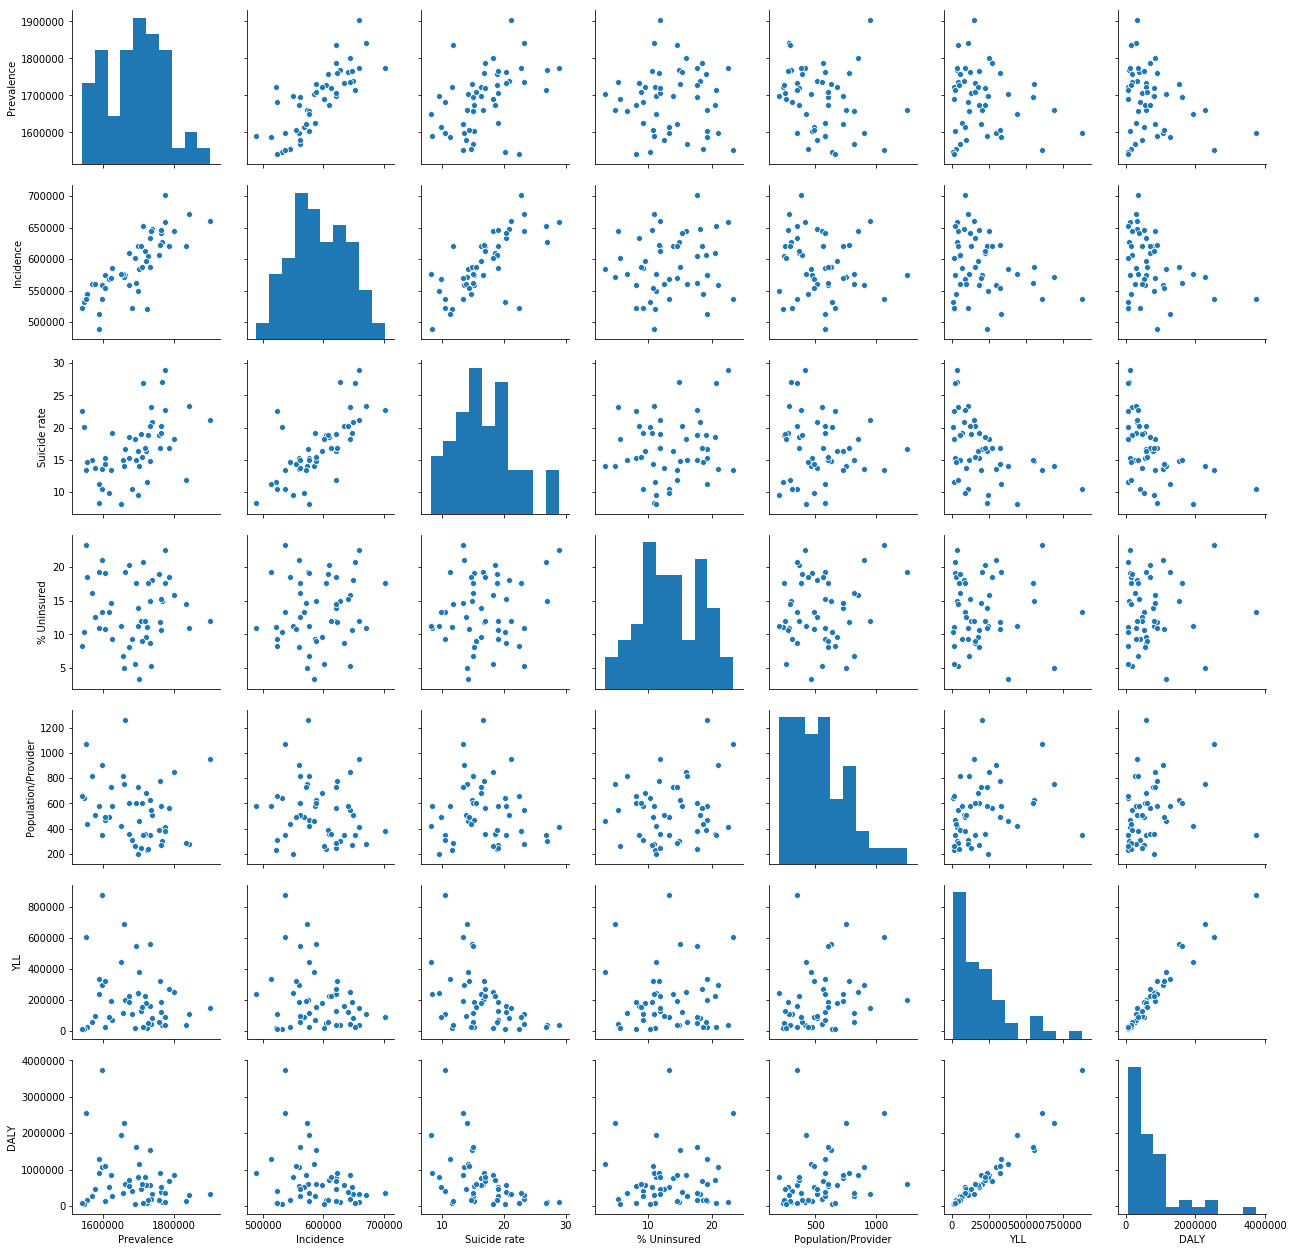

In [200]:

pairplot = sns.pairplot(combined5)
pairplot
pairplot.savefig("output images/pairplot.png")

In [202]:
correlation = combined5.corr()
correlation
correlation.to_csv("Output_CSVs/correlation_statistics.csv", encoding="utf-8", index=False)

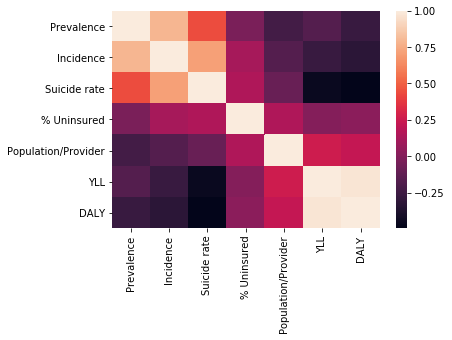

In [201]:
heatmap = sns.heatmap(correlation)
heatmap
heatmap.figure.savefig("output images/heatmap.png")

In [180]:
y_axis = combined5["Suicide rate"]
prevalence = combined5["Prevalence"]
incidence = combined5["Incidence"]
uninsured = combined5["% Uninsured"]
access = combined5["Population/Provider"]
YLL = combined5["YLL"]
DALY = combined5["DALY"]

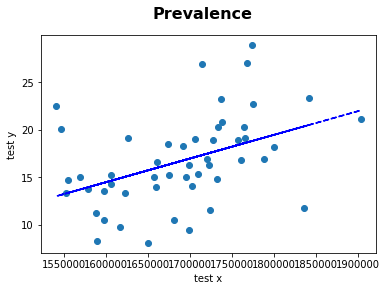

In [181]:
x_axis = prevalence

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots()

fig.suptitle("Prevalence", fontsize=16, fontweight="bold")

ax.set_xlabel("test x")
ax.set_ylabel("test y")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

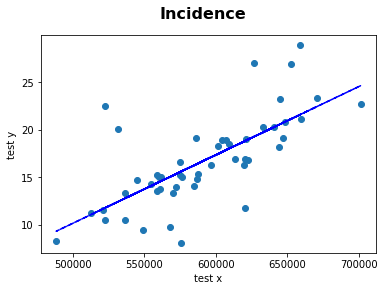

In [183]:
x_axis = incidence

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots()

fig.suptitle("Incidence", fontsize=16, fontweight="bold")

ax.set_xlabel("test x")
ax.set_ylabel("test y")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()